### The Data Science Process
**4. Preprocessing and Modeling**

**Loan Default Prediction - Classification**

In [719]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score

In [720]:
import_path = r'.\datasets\df_order.csv'
df_order = pd.read_csv(import_path)

In [721]:
import_path = r'.\datasets\df_loan.csv'
df_loan = pd.read_csv(import_path)

In [722]:
import_path = r'.\datasets\df_trans.csv'
df_trans = pd.read_csv(import_path)

C:\Users\engso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [723]:
import_path = r'.\datasets\df_district.csv'
df_district = pd.read_csv(import_path)

In [724]:
import_path = r'.\datasets\df_disp.csv'
df_disp = pd.read_csv(import_path)

In [725]:
import_path = r'.\datasets\df_account.csv'
df_account = pd.read_csv(import_path)

In [726]:
import_path = r'.\datasets\df_client.csv'
df_client = pd.read_csv(import_path)

In [727]:
import_path = r'.\datasets\df_card.csv'
df_card = pd.read_csv(import_path)

In [728]:
df_trans.head()

,trans_id,account_id,amount,balance,bank,account,trans_type,trans_operation,trans_k_symbol,amount_multiplier,trans_amount
0,695247,2378,700.0,700.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,700.0
1,171812,576,900.0,900.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,900.0
2,207264,704,1000.0,1000.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,1000.0
3,1117247,3818,600.0,600.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,600.0
4,579373,1972,400.0,400.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,400.0


In [729]:
df_trans.shape

(1056320, 11)

In [730]:
df_trans.dtypes

trans_id               int64
account_id             int64
amount               float64
balance              float64
bank                  object
account              float64
trans_type            object
trans_operation       object
trans_k_symbol        object
amount_multiplier      int64
trans_amount         float64
dtype: object

In [731]:
df_trans.isnull().sum()

trans_id                  0
account_id                0
amount                    0
balance                   0
bank                 782812
account              760931
trans_type                0
trans_operation           0
trans_k_symbol            0
amount_multiplier         0
trans_amount              0
dtype: int64

In [732]:
df_loan.head()

,loan_id,account_id,date,loan_amount,loan_duration,monthly_loan_payment,loan_status
0,5314,1787,1993-07-05,96396,12,8033.0,B
1,5316,1801,1993-07-11,165960,36,4610.0,A
2,6863,9188,1993-07-28,127080,60,2118.0,A
3,5325,1843,1993-08-03,105804,36,2939.0,A
4,7240,11013,1993-09-06,274740,60,4579.0,A


In [733]:
df_loan.shape

(682, 7)

In [734]:
df_loan.dtypes

loan_id                   int64
account_id                int64
date                     object
loan_amount               int64
loan_duration             int64
monthly_loan_payment    float64
loan_status              object
dtype: object

In [735]:
df_loan.isnull().sum()

loan_id                 0
account_id              0
date                    0
loan_amount             0
loan_duration           0
monthly_loan_payment    0
loan_status             0
dtype: int64

In [736]:
df_account.head()

,account_id,district_id,statement_freq,date
0,576,55,MONTHLY,1993-01-01
1,3818,74,MONTHLY,1993-01-01
2,704,55,MONTHLY,1993-01-01
3,2378,16,MONTHLY,1993-01-01
4,2632,24,MONTHLY,1993-01-02


In [737]:
df_account.shape

(4500, 4)

In [738]:
df_account.dtypes

account_id         int64
district_id        int64
statement_freq    object
date              object
dtype: object

In [739]:
df_account.isnull().sum()

account_id        0
district_id       0
statement_freq    0
date              0
dtype: int64

In [740]:
df_district.head()

,district_id,district_name,region,num_inhabitants,num_munipalities_gt499,num_munipalities_500to1999,num_munipalities_2000to9999,num_munipalities_gt10000,num_cities,ratio_urban,average_salary,unemp_rate95,unemp_rate96,num_entrep_per1000,num_crimes95,num_crimes96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [741]:
df_district.dtypes

district_id                      int64
district_name                   object
region                          object
num_inhabitants                  int64
num_munipalities_gt499           int64
num_munipalities_500to1999       int64
num_munipalities_2000to9999      int64
num_munipalities_gt10000         int64
num_cities                       int64
ratio_urban                    float64
average_salary                   int64
unemp_rate95                   float64
unemp_rate96                   float64
num_entrep_per1000               int64
num_crimes95                     int64
num_crimes96                     int64
dtype: object

In [742]:
df_district.isnull().sum()

district_id                    0
district_name                  0
region                         0
num_inhabitants                0
num_munipalities_gt499         0
num_munipalities_500to1999     0
num_munipalities_2000to9999    0
num_munipalities_gt10000       0
num_cities                     0
ratio_urban                    0
average_salary                 0
unemp_rate95                   0
unemp_rate96                   0
num_entrep_per1000             0
num_crimes95                   0
num_crimes96                   0
dtype: int64

In [743]:
# Enrich df_loan with district_id column
#pd.merge(df_a, df_b, on='subject_id', how='left')
df_loan_account = pd.merge(df_loan, df_account, on='account_id', how='left')

In [744]:
df_loan_account.head()

,loan_id,account_id,date_x,loan_amount,loan_duration,monthly_loan_payment,loan_status,district_id,statement_freq,date_y
0,5314,1787,1993-07-05,96396,12,8033.0,B,30,WEEKLY,1993-03-22
1,5316,1801,1993-07-11,165960,36,4610.0,A,46,MONTHLY,1993-02-13
2,6863,9188,1993-07-28,127080,60,2118.0,A,45,MONTHLY,1993-02-08
3,5325,1843,1993-08-03,105804,36,2939.0,A,12,MONTHLY,1993-01-30
4,7240,11013,1993-09-06,274740,60,4579.0,A,1,WEEKLY,1993-02-14


In [745]:
# df.drop(columns =['C', 'D'])
df_loan_account.drop(columns = ['statement_freq', 'date_y'], inplace = True)

In [746]:
df_loan_account

,loan_id,account_id,date_x,loan_amount,loan_duration,monthly_loan_payment,loan_status,district_id
0,5314,1787,1993-07-05,96396,12,8033.0,B,30
1,5316,1801,1993-07-11,165960,36,4610.0,A,46
2,6863,9188,1993-07-28,127080,60,2118.0,A,45
3,5325,1843,1993-08-03,105804,36,2939.0,A,12
4,7240,11013,1993-09-06,274740,60,4579.0,A,1
...,...,...,...,...,...,...,...,...
677,4989,105,1998-12-05,352704,48,7348.0,C,21
678,5221,1284,1998-12-05,52512,12,4376.0,C,55
679,6402,6922,1998-12-06,139488,24,5812.0,C,3
680,5346,1928,1998-12-06,55632,24,2318.0,C,70


In [747]:
df_loan_account.shape

(682, 8)

In [748]:
# Encich df_loan with columns from district_id
df_loan_account_district = pd.merge(df_loan_account, df_district, on='district_id', how='left')

In [749]:
df_loan_account_district

,loan_id,account_id,date_x,loan_amount,loan_duration,monthly_loan_payment,loan_status,district_id,district_name,region,...,num_munipalities_2000to9999,num_munipalities_gt10000,num_cities,ratio_urban,average_salary,unemp_rate95,unemp_rate96,num_entrep_per1000,num_crimes95,num_crimes96
0,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,5316,1801,1993-07-11,165960,36,4610.0,A,46,Nachod,east Bohemia,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,6863,9188,1993-07-28,127080,60,2118.0,A,45,Jicin,east Bohemia,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,5325,1843,1993-08-03,105804,36,2939.0,A,12,Pribram,central Bohemia,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,7240,11013,1993-09-06,274740,60,4579.0,A,1,Hl.m. Praha,Prague,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,4989,105,1998-12-05,352704,48,7348.0,C,21,Tabor,south Bohemia,...,7,1,7,67.0,9104,1.51,2.07,123,2299,2354
678,5221,1284,1998-12-05,52512,12,4376.0,C,55,Brno - venkov,south Moravia,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
679,6402,6922,1998-12-06,139488,24,5812.0,C,3,Beroun,central Bohemia,...,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
680,5346,1928,1998-12-06,55632,24,2318.0,C,70,Karvina,north Moravia,...,8,5,7,89.9,10177,6.63,7.75,81,9878,10108


In [750]:
df_loan_account_district.shape

(682, 23)

In [751]:
df_loan_account_district.isnull().sum()

loan_id                        0
account_id                     0
date_x                         0
loan_amount                    0
loan_duration                  0
monthly_loan_payment           0
loan_status                    0
district_id                    0
district_name                  0
region                         0
num_inhabitants                0
num_munipalities_gt499         0
num_munipalities_500to1999     0
num_munipalities_2000to9999    0
num_munipalities_gt10000       0
num_cities                     0
ratio_urban                    0
average_salary                 0
unemp_rate95                   0
unemp_rate96                   0
num_entrep_per1000             0
num_crimes95                   0
num_crimes96                   0
dtype: int64

In [752]:
# Encich df_loan with columns from df_trans
df_loan_account_district_trans = pd.merge(df_loan_account_district, df_trans, on='account_id', how='left')

In [753]:
df_loan_account_district_trans

,loan_id,account_id,date_x,loan_amount,loan_duration,monthly_loan_payment,loan_status,district_id,district_name,region,...,trans_id,amount,balance,bank,account,trans_type,trans_operation,trans_k_symbol,amount_multiplier,trans_amount
0,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,523621,1100.0,1100.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,1100.0
1,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,524054,9900.0,11000.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,9900.0
2,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,524055,5800.0,16800.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,5800.0
3,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,524056,3300.0,20100.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,3300.0
4,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,523624,42248.0,62348.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,42248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191551,6748,8645,1998-12-08,240900,60,4015.0,C,60,Prostejov,south Moravia,...,2616325,4015.0,15798.8,CD,50500750.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,LOAN_PAYMENT,-1,-4015.0
191552,6748,8645,1998-12-08,240900,60,4015.0,C,60,Prostejov,south Moravia,...,2616277,25394.0,41192.8,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,25394.0
191553,6748,8645,1998-12-08,240900,60,4015.0,C,60,Prostejov,south Moravia,...,2616331,3840.0,37352.8,NaN,NaN,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,-1,-3840.0
191554,6748,8645,1998-12-08,240900,60,4015.0,C,60,Prostejov,south Moravia,...,3502675,127.7,37613.0,NaN,NaN,CREDIT,UNKNOWN,INTEREST_CREDITED,1,127.7


In [754]:
df_loan_account_district_trans.shape

(191556, 33)

In [755]:
df_loan_account_district_trans.dtypes

loan_id                          int64
account_id                       int64
date_x                          object
loan_amount                      int64
loan_duration                    int64
monthly_loan_payment           float64
loan_status                     object
district_id                      int64
district_name                   object
region                          object
num_inhabitants                  int64
num_munipalities_gt499           int64
num_munipalities_500to1999       int64
num_munipalities_2000to9999      int64
num_munipalities_gt10000         int64
num_cities                       int64
ratio_urban                    float64
average_salary                   int64
unemp_rate95                   float64
unemp_rate96                   float64
num_entrep_per1000               int64
num_crimes95                     int64
num_crimes96                     int64
trans_id                         int64
amount                         float64
balance                  

In [756]:
df_loan_account_district_trans.isnull().sum()

loan_id                             0
account_id                          0
date_x                              0
loan_amount                         0
loan_duration                       0
monthly_loan_payment                0
loan_status                         0
district_id                         0
district_name                       0
region                              0
num_inhabitants                     0
num_munipalities_gt499              0
num_munipalities_500to1999          0
num_munipalities_2000to9999         0
num_munipalities_gt10000            0
num_cities                          0
ratio_urban                         0
average_salary                      0
unemp_rate95                        0
unemp_rate96                        0
num_entrep_per1000                  0
num_crimes95                        0
num_crimes96                        0
trans_id                            0
amount                              0
balance                             0
bank        

In [757]:
def convert_loan_status(x):
    if x == 'A':
        return 'has_not_defaulted'
    elif x == 'C':
        return 'has_not_defaulted'
    if x == 'B':
        return 'has_defaulted'
    elif x == 'D':
        return 'has_defaulted' 
    else:
        return 'UNKNOWN'

In [758]:
df_loan_account_district_trans['loan_status_defaulted'] = df_loan_account_district_trans['loan_status'].map(convert_loan_status)

In [759]:
df_loan_account_district_trans['loan_status_defaulted'].value_counts()

has_not_defaulted    168796
has_defaulted         22760
Name: loan_status_defaulted, dtype: int64

In [760]:
df_loan_account_district_trans['loan_status_defaulted'].value_counts(normalize=True)

has_not_defaulted    0.881184
has_defaulted        0.118816
Name: loan_status_defaulted, dtype: float64

In [761]:
df_loan_account_district_trans

,loan_id,account_id,date_x,loan_amount,loan_duration,monthly_loan_payment,loan_status,district_id,district_name,region,...,amount,balance,bank,account,trans_type,trans_operation,trans_k_symbol,amount_multiplier,trans_amount,loan_status_defaulted
0,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,1100.0,1100.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,1100.0,has_defaulted
1,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,9900.0,11000.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,9900.0,has_defaulted
2,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,5800.0,16800.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,5800.0,has_defaulted
3,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,3300.0,20100.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,3300.0,has_defaulted
4,5314,1787,1993-07-05,96396,12,8033.0,B,30,Sokolov,west Bohemia,...,42248.0,62348.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,42248.0,has_defaulted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191551,6748,8645,1998-12-08,240900,60,4015.0,C,60,Prostejov,south Moravia,...,4015.0,15798.8,CD,50500750.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,LOAN_PAYMENT,-1,-4015.0,has_not_defaulted
191552,6748,8645,1998-12-08,240900,60,4015.0,C,60,Prostejov,south Moravia,...,25394.0,41192.8,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,25394.0,has_not_defaulted
191553,6748,8645,1998-12-08,240900,60,4015.0,C,60,Prostejov,south Moravia,...,3840.0,37352.8,NaN,NaN,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,-1,-3840.0,has_not_defaulted
191554,6748,8645,1998-12-08,240900,60,4015.0,C,60,Prostejov,south Moravia,...,127.7,37613.0,NaN,NaN,CREDIT,UNKNOWN,INTEREST_CREDITED,1,127.7,has_not_defaulted


In [762]:
df_loan_account_district_trans_selected = df_loan_account_district_trans[['loan_amount', 'loan_duration', 'monthly_loan_payment', 'num_inhabitants', 'num_munipalities_gt499', 'num_munipalities_500to1999', 'num_munipalities_2000to9999', 'num_munipalities_gt10000', 'num_cities', 'ratio_urban', 'average_salary', 'unemp_rate95', 'unemp_rate96', 'num_entrep_per1000', 'num_crimes95', 'num_crimes96', 'balance', 'trans_amount', 'district_name', 'region', 'trans_type', 'trans_operation', 'trans_k_symbol', 'loan_status_defaulted']]

In [763]:
cat_var = ['district_name', 'region', 'trans_type', 'trans_operation', 'trans_k_symbol']

In [764]:
df_loan_account_district_trans_selected_dumm = pd.get_dummies(df_loan_account_district_trans_selected, columns = cat_var, drop_first = True)

In [765]:
df_loan_account_district_trans_selected_dumm

,loan_amount,loan_duration,monthly_loan_payment,num_inhabitants,num_munipalities_gt499,num_munipalities_500to1999,num_munipalities_2000to9999,num_munipalities_gt10000,num_cities,ratio_urban,...,trans_operation_CREDIT_IN_CASH,trans_operation_REMITTANCE_TO_OTHER_BANK,trans_operation_UNKNOWN,trans_operation_WITHDRAWAL_IN_CASH,trans_k_symbol_INSURANCE_PAYMENT,trans_k_symbol_INTEREST_CREDITED,trans_k_symbol_LOAN_PAYMENT,trans_k_symbol_PAYMENT_ON_STATEMENT,trans_k_symbol_SANCTION_INTEREST,trans_k_symbol_UNKNOWN
0,96396,12,8033.0,94812,15,13,8,2,10,81.8,...,1,0,0,0,0,0,0,0,0,1
1,96396,12,8033.0,94812,15,13,8,2,10,81.8,...,1,0,0,0,0,0,0,0,0,1
2,96396,12,8033.0,94812,15,13,8,2,10,81.8,...,1,0,0,0,0,0,0,0,0,1
3,96396,12,8033.0,94812,15,13,8,2,10,81.8,...,1,0,0,0,0,0,0,0,0,1
4,96396,12,8033.0,94812,15,13,8,2,10,81.8,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191551,240900,60,4015.0,110643,49,41,4,1,4,51.9,...,0,1,0,0,0,0,1,0,0,0
191552,240900,60,4015.0,110643,49,41,4,1,4,51.9,...,1,0,0,0,0,0,0,0,0,1
191553,240900,60,4015.0,110643,49,41,4,1,4,51.9,...,0,0,0,1,0,0,0,0,0,1
191554,240900,60,4015.0,110643,49,41,4,1,4,51.9,...,0,0,1,0,0,1,0,0,0,0


In [766]:
df_loan_account_district_trans_selected_dumm[['loan_status_defaulted']]

,loan_status_defaulted
0,has_defaulted
1,has_defaulted
2,has_defaulted
3,has_defaulted
4,has_defaulted
...,...
191551,has_not_defaulted
191552,has_not_defaulted
191553,has_not_defaulted
191554,has_not_defaulted


In [767]:
#df_train_dummies
features_train_dummies = [col for col in df_loan_account_district_trans_selected_dumm._get_numeric_data().columns if col!='loan_status_defaulted']
X = df_loan_account_district_trans_selected_dumm[features_train_dummies]
y = df_loan_account_district_trans_selected_dumm['loan_status_defaulted']

In [768]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)

**First Model - Logistic Regression**

In [769]:
logreg = LogisticRegression()

print("Cross validation on over sampled train data:\n",cross_val_score(logreg, X_train,y_train,n_jobs=-1, cv = 10).mean().round(3),"\n")

print("Cross validation on test data: \n", cross_val_score(logreg, X_test,y_test,n_jobs=-1, cv = 10).mean().round(3), "\n")

Cross validation on over sampled train data:
 0.883 

Cross validation on test data: 
 0.884 



In [770]:
logreg.fit(X_train, y_train)
predicted = logreg.predict_proba(X_train)
print("ROC score on train dataset: ", roc_auc_score(y_train, predicted[:,1]).round(3))
predict = logreg.predict_proba(X_test)
print("ROC score on test dataset: ", roc_auc_score(y_test, predict[:,1]).round(3))

C:\Users\engso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ROC score on train dataset:  0.709
ROC score on test dataset:  0.709


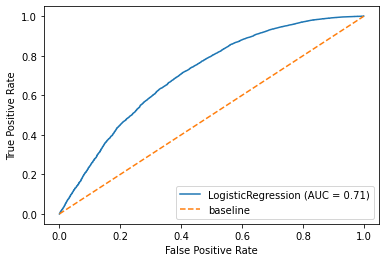

In [771]:
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [772]:
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

0.7088870287408422

In [773]:
print('model accuracy on itself:', logreg.score(X_train, y_train))
print('model accuracy on test set:', logreg.score(X_test, y_test))

model accuracy on itself: 0.8836197595829244
model accuracy on test set: 0.8842114055419825


**Second Model - Gradient Boosting Classifier**

In [774]:
gbc = GradientBoostingClassifier()
print("Cross validation on train dataset: \n", cross_val_score(gbc, X_train,y_train, n_jobs=-1, cv = 10).mean().round(3), "\n")
print("Cross validation on test dataset: \n", cross_val_score(gbc, X_test,y_test, n_jobs=-1, cv = 10).mean().round(3), "\n")

Cross validation on train dataset: 
 0.946 

Cross validation on test dataset: 
 0.945 



In [775]:
gbc.fit(X_train, y_train)
predicted = gbc.predict_proba(X_train)
#print("ROC score on train dataset: ", roc_auc_score(y_train, predicted[:,1]).round(3))
predict = gbc.predict(X_test)
#print("ROC score on test dataset: ", roc_auc_score(y_test, predict[:,1]).round(3))

In [776]:
gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [3,4],
    'n_estimators': [125, 150],
    'learning_rate': [.12,1]
}
gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=3, verbose = 1)
gb_gs.fit(X_train, y_train)
print(gb_gs.best_score_)
gb_gs.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 16.3min finished


0.9999930394593052


{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 150}

In [777]:
# Test gbc using gridserachcv updated results
gbc_best = GradientBoostingClassifier(learning_rate=1, n_estimators=125, random_state=42, max_depth=4)
gbc_best.fit(X_train, y_train)
predicted = gbc_best.predict_proba(X_train)
print("ROC score on train dataset: ", roc_auc_score(y_train, predicted[:,1]).round(3))
predict = gbc_best.predict_proba(X_test)
print("ROC score on test dataset: ", roc_auc_score(y_test, predict[:,1]).round(3))

ROC score on train dataset:  1.0
ROC score on test dataset:  1.0


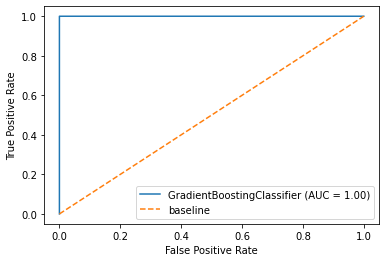

In [778]:
plot_roc_curve(gbc_best, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [779]:
roc_auc_score(y_test, gbc_best.predict_proba(X_test)[:,1])

1.0

In [780]:
print('model accuracy on itself:', gbc_best.score(X_train, y_train))
print('model accuracy on test set:', gbc_best.score(X_test, y_test))

model accuracy on itself: 1.0
model accuracy on test set: 0.9999791183779156


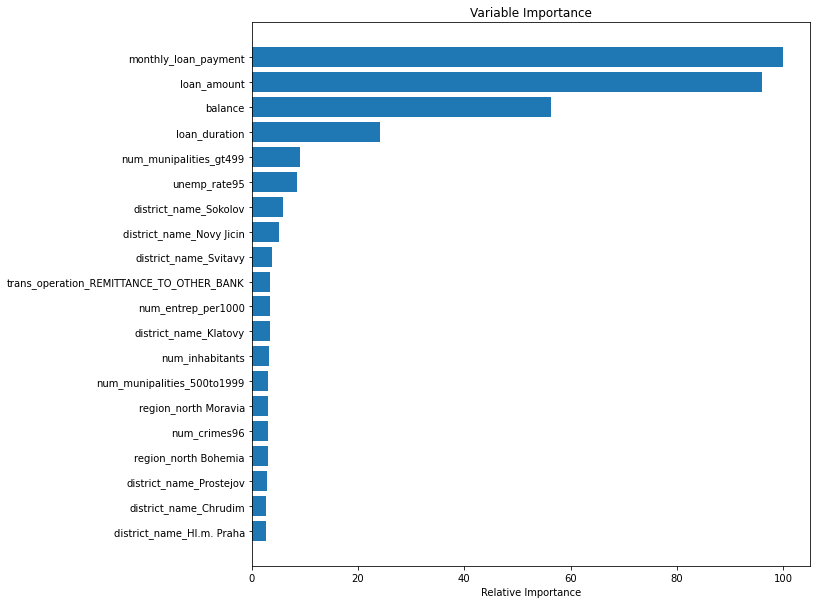

In [800]:
# Plot feature importance
feature_importance = gbc_best.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-20:]
pos = np.arange(sorted_idx.shape[0]) + .2
plt.figure(figsize = [10,10])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Third Model - Random Forest Classifier**

In [782]:
rfc = RandomForestClassifier()
print("Cross validation score on train dataset: ", cross_val_score(rfc, X_train,y_train, n_jobs=-1).mean().round(3), "\n")
print("Cross validation score on test dataset: ", cross_val_score(rfc, X_test,y_test, n_jobs=-1).mean().round(3), "\n")

Cross validation score on train dataset:  1.0 

Cross validation score on test dataset:  0.999 



In [783]:
rfc.fit(X_train, y_train)
predicted = rfc.predict_proba(X_train)
print("ROC score on train dataset: ", roc_auc_score(y_train, predicted[:,1]).round(3))
predict = rfc.predict_proba(X_test)
print("ROC score on test dataset: ", roc_auc_score(y_test, predict[:,1]).round(3))

ROC score on train dataset:  1.0
ROC score on test dataset:  1.0


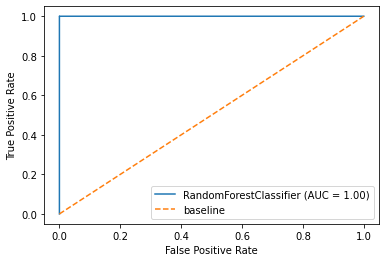

In [784]:
plot_roc_curve(rfc, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [785]:
roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])

0.9999996564107854

In [786]:
print('model accuracy on itself:', rfc.score(X_train, y_train))
print('model accuracy on test set:', rfc.score(X_test, y_test))

model accuracy on itself: 1.0
model accuracy on test set: 0.9998120654012403


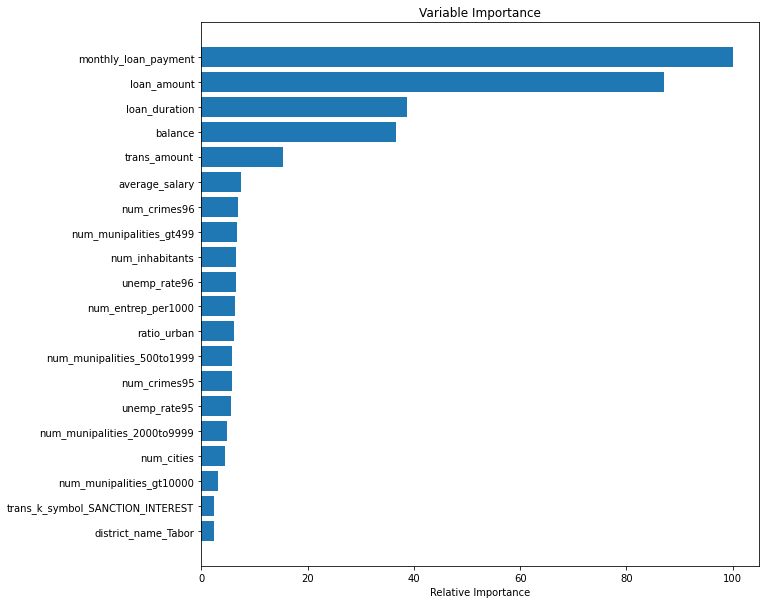

In [787]:
# Plot feature importance
feature_importance = rfc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-20:]
pos = np.arange(sorted_idx.shape[0]) + .2
plt.figure(figsize = [10,10])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Fourth Model - Decision Tree Classifier**

In [788]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, ensemble, metrics

In [789]:
dtree = tree.DecisionTreeClassifier()
print("Cross validation score on train dataset: ", cross_val_score(dtree, X_train,y_train, n_jobs=-1).mean().round(3), "\n")
print("Cross validation score on test dataset: ", cross_val_score(dtree, X_test,y_test, n_jobs=-1).mean().round(3), "\n")

Cross validation score on train dataset:  0.999 

Cross validation score on test dataset:  0.996 



In [790]:
dtree_model = dtree.fit(X_train, y_train)
predicted = dtree_model.predict_proba(X_train)
print("ROC score on train dataset: ", roc_auc_score(y_train, predicted[:,1]).round(3))
predict = dtree_model.predict_proba(X_test)
print("ROC score on test dataset: ", roc_auc_score(y_test, predict[:,1]).round(3))

ROC score on train dataset:  1.0
ROC score on test dataset:  0.998


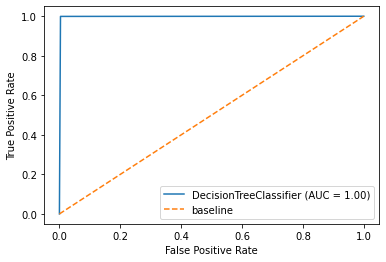

In [791]:
plot_roc_curve(dtree, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [792]:
roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1])

0.9978396776075329

In [801]:
print('model accuracy on itself:', dtree.score(X_train, y_train))
print('model accuracy on test set:', dtree.score(X_test, y_test))

model accuracy on itself: 1.0
model accuracy on test set: 0.9988723924074422


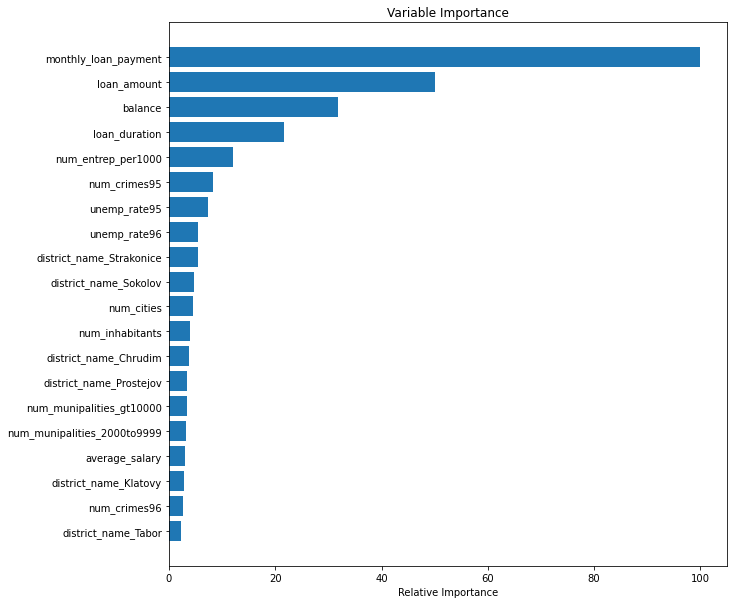

In [793]:
# Plot feature importance
feature_importance = dtree.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-20:]
pos = np.arange(sorted_idx.shape[0]) + .2
plt.figure(figsize = [10,10])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### The Data Science Process
**5. Evaluation and Conceptual Understanding**<br>
**6. Conclusion and Recommendations**

**Evaluation of Loans Default Prediction Classification**<br>

<img src="./datasets/figure6.jpg" style="height: 100px">
Gradient Booasting Classifier, Random Forest Classifier and Decision Tree Classifier all achieve perfect/almost perfect score of 1 in the Model Accuracy Score AND ROC Score for both train and test dataset.

**Conclusions and Recommendations for Time Series Forecasting**<br>
<img src="./datasets/figure7.jpg" style="height: 400px">

1. The Random Forest Classifier has produced above features that best predict whether the loan will be defaulted.<br>
It is worth noting that Monthly loan payment, loan amount, loan duration and balance has consistently appeared in all 3 models for Gradient Booasting, Random Forest and Decision Tree Classifier as the top 4 most important features.

2. Future Scope for enhancement may include adding in macroeconomic factors like economic growth, national stock market index, Central Bank benchmark interest rates and strength of national currency as these may also influence an individual's ability to service the loan.

**End of current notebook**